In [1]:
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas-datareader
!pip install finance-datareader
!pip install TA-Lib

  Obtaining dependency information for pandas-datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   -------------- ------------------------ 41.0/109.5 kB 326.8 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 636.0 kB/s eta 0:00:00
  Obtaining dependency information for finance-datareader from https://files.pythonhosted.org/packages/e3/15/724a966c42658a7640813f94650d2f18e24e78ac353765762da82b86fb96/finance_datareader-0.9.90-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/46.6 kB ? eta -:--:--
   -------- ------------------------------- 10.2/46.6 kB ? eta -:--:--
   -------------------------- ------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pathlib import Path
import yfinance as yf
from pandas_datareader import data as pdr
import FinanceDataReader as fdr
import pandas_ta  as ta

import warnings
warnings.filterwarnings('ignore')

In [6]:
origin_data = '2009-07-01'
start_date = '2014-01-01'
end_date = '2024-03-01'
def create_dataframe(startdate, enddate):
    df = fdr.DataReader('^GSPC', start = '2009-07-01', end = enddate)[['Adj Close']]
    df.columns = ['S&P 500']
    indexes = {'FRED:M2SL':'M2', 'FRED:DGS10': '10_year_treasury', 'FRED:DTB3': '3_months_treasury','FRED:CSUSHPINSA': 'Shiller_index', 'FRED:FEDFUNDS': 'Fed_fund_effective_rate', 'FRED:UNRATE': 'Unemployment', 'FRED:DSPIC96': 'Disposable_income', 'FRED:GDP': 'GDP', 'FRED:CPIAUCSL': 'CPI', 'FRED:INDPRO': 'Industrial_production', 'FRED:TOTCI': 'Commercial_loans', 'FRED:GPDI': 'Private_investment'}
    tickers = {'GC=F': 'Gold', 'HG=F': 'Copper', 'DX=F': 'US_dollar', 'CL=F': 'Crude_oil', 'VIX': 'VIX', 'ZW=F': 'Wheat'}

    for tkrs, name in tickers.items():
      dataframe = fdr.DataReader(tkrs, start = startdate, end = enddate)[['Adj Close']]
      dataframe.columns = [name]
      df= df.join(dataframe)
    for indx, name in indexes.items():
      dataframe = fdr.DataReader(indx, start = startdate, end = enddate)
      dataframe.columns = [name]
      df = df.join(dataframe)

    df.fillna(method = 'ffill', inplace = True)
    df.fillna(0, inplace = True)
    df = df[startdate:]
    return df

In [7]:
df = create_dataframe(start_date, end_date)

In [8]:
df.tail()

,S&P 500,Gold,Copper,US_dollar,Crude_oil,VIX,Wheat,M2,10_year_treasury,3_months_treasury,Shiller_index,Fed_fund_effective_rate,Unemployment,Disposable_income,GDP,CPI,Industrial_production,Commercial_loans,Private_investment
Date,,,,,,,,,,,,,,,,,,,
2024-02-23,5088.799805,2038.599976,3.8820,103.859001,76.489998,13.75,573.50,20827.2,4.26,5.26,310.668,5.33,3.9,16952.7,25994.639,311.054,102.3313,2765.9266,4724.621
2024-02-26,5069.529785,2028.500000,3.8240,103.750999,77.580002,13.74,577.25,20827.2,4.28,5.26,310.668,5.33,3.9,16952.7,25994.639,311.054,102.3313,2765.9266,4724.621
2024-02-27,5078.180176,2034.000000,3.8310,103.759003,78.870003,13.43,586.00,20827.2,4.31,5.25,310.668,5.33,3.9,16952.7,25994.639,311.054,102.3313,2765.9266,4724.621
2024-02-28,5069.759766,2033.000000,3.8275,103.903999,78.540001,13.84,571.00,20827.2,4.27,5.24,310.668,5.33,3.9,16952.7,25994.639,311.054,102.3313,2770.2811,4724.621
2024-02-29,5096.270020,2045.699951,3.8345,104.098000,78.260002,13.40,577.50,20827.2,4.25,5.25,310.668,5.33,3.9,16952.7,25994.639,311.054,102.3313,2770.2811,4724.621


<Axes: >

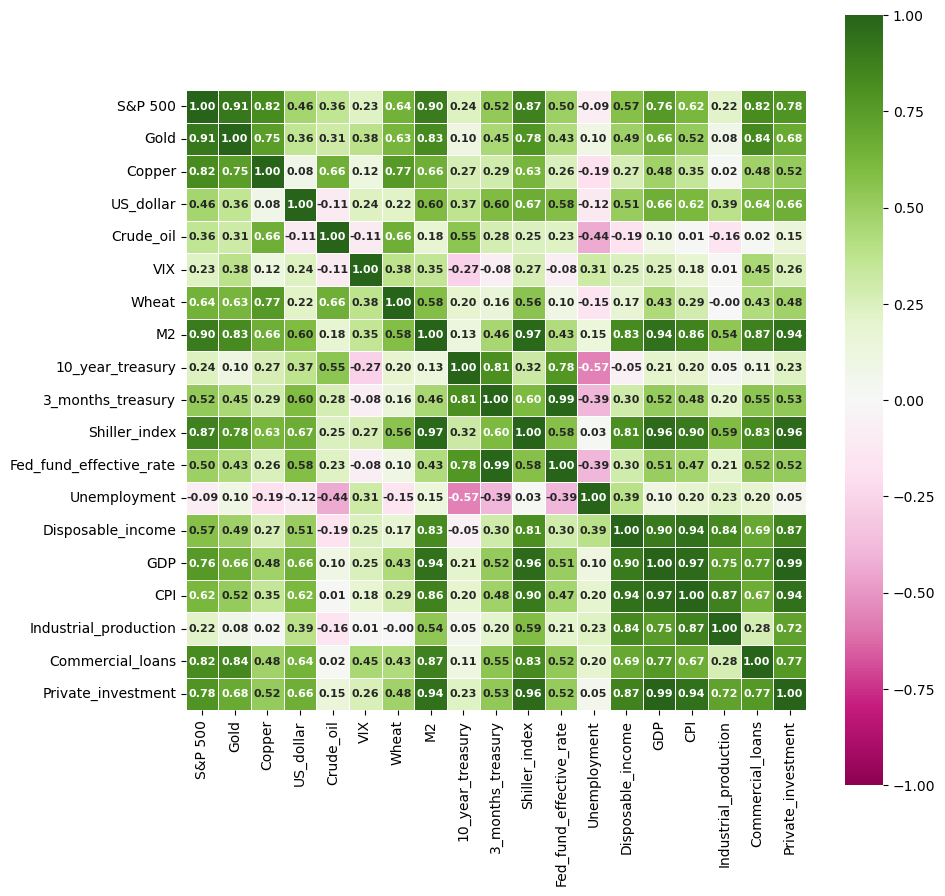

In [9]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'PiYG',
            linewidths = .5, square = True, annot_kws = {'fontsize':8, 'fontweight': 'bold'}, vmin = -1, vmax = 1)

In [ ]:
#Get SP500 stocks historical daily close price
start_date = '2014-01-01'
tickersPath = Path("./Data/sp500.csv")
tickers_df = pd.read_csv(tickersPath)
tickers = tickers_df['Symbol']
end_date = dt.datetime.now().strftime("%Y-%m-%d")
datetime = pd.date_range(start=start_date,end=end_date)
price_df = pd.DataFrame()

# technical analysis window range
window = [5, 12, 26, 50, 100, 200]
name_head_sma = 'sma_'
name_head_ema = 'ema_'
name_window_sma = []
name_window_ema = []
for num in window:
    name_window_sma.append(name_head_sma + str(num))
    name_window_ema.append(name_head_ema + str(num))
iterables_sma = [tickers, name_window_sma]
col_index_sma=pd.MultiIndex.from_product(iterables_sma)
iterables_ema = [tickers, name_window_ema]
col_index_ema=pd.MultiIndex.from_product(iterables_ema)

SMA_df = pd.DataFrame()
EMA_df = pd.DataFrame()
VWAP_df = pd.DataFrame()
#read data and technical analysis
for ticker in tickers:
    stock = yf.Ticker(ticker)
    stock_data = stock.history(start=start_date,  end=end_date)
    prices = stock_data[['Close']]
    VWAP = stock_data[['Volume']]
     # VWAP modified to use Annual cummulative sum
    VWAP['typical_price'] = (stock_data['High']+stock_data['Low']+stock_data['Close'])/3
    VWAP['vw_typical_price'] = VWAP['typical_price']*VWAP['Volume']
    VWAP['vwap_annual'] = VWAP.groupby(VWAP.index.year)['vw_typical_price'].cumsum() / VWAP.groupby(VWAP.index.year)['Volume'].cumsum()
    # RSI Momemtum Indicator 14Days
    VWAP['rsi_14'] = prices.ta.rsi()
    
    #Concat all tickers close price data
    price_df=pd.concat([price_df,prices],axis=1)
    
    #Calculate SMA and EMA for different window for each ticker
    SMA = pd.DataFrame()
    EMA = pd.DataFrame()
    for i in range(len(window)):
        # Simple Moving Avg SMA
        SMA[name_window_sma[i]] = prices.ta.sma(length=window[i])
        # Exponentially Weighted Moving Avg EWMA
        EMA[name_window_ema[i]] = prices.ta.ema(length=window[i])
    #Concat all tickers SMA, EWMA and VWAP data in dataframes
    SMA_df = pd.concat([SMA_df,SMA], axis=1)
    EMA_df = pd.concat([EMA_df,EMA], axis=1)
    VWAP_df = pd.concat([VWAP_df,VWAP], axis=1)
    #print(str(len(SMA_df.columns))+ticker)

#Rename SMA, EWMA and VWAP dataframes with tickers
SMA_df.columns= col_index_sma
EMA_df.columns= col_index_ema
iterables_vwap = [tickers, VWAP.columns]
col_index_vwap=pd.MultiIndex.from_product(iterables_vwap)
VWAP_df.columns= col_index_vwap

price_df.columns=tickers


In [242]:
price_df.to_csv('./Data/sp500_closeprice.csv')
SMA_df.to_csv('./Data/sp500_sma.csv')
EMA_df.to_csv('./Data/sp500_ema.csv')
VWAP_df.to_csv('./Data/sp500_vwap.csv')
#price_df.tail(10)
#SMA_df.tail(30)

Symbol                           MSFT                                      \
                                sma_5      sma_12      sma_26      sma_50   
Date                                                                        
2024-02-02 00:00:00-05:00  405.428265  401.773689  388.467780  381.143770   
2024-02-05 00:00:00-05:00  404.615771  402.753545  389.680153  381.794167   
2024-02-06 00:00:00-05:00  403.996912  403.320826  390.839932  382.345947   
2024-02-07 00:00:00-05:00  407.284827  404.779793  392.299156  383.076995   
2024-02-08 00:00:00-05:00  409.347009  406.044952  393.959163  383.785684   
2024-02-09 00:00:00-05:00  411.209558  407.541351  395.876770  384.541286   
2024-02-12 00:00:00-05:00  413.128009  408.405586  397.693411  385.268142   
2024-02-13 00:00:00-05:00  413.293707  408.604385  399.174134  385.815330   
2024-02-14 00:00:00-05:00  412.534564  408.648242  400.539196  386.528755   
2024-02-15 00:00:00-05:00  411.177441  408.541924  401.749336  387.290782   
2024-02-16 00:00:00-05:00  408.034698  409.143079  402.595357  387.935335   
2024-02-20 00:00:00-05:00  405.694000  409.122688  403.321125  388.628751   
2024-02-21 00:00:00-05:00  405.015997  408.432607  403.876011  389.267045   
2024-02-22 00:00:00-05:00  405.447998  408.995003  404.726025  390.029260   
2024-02-23 00:00:00-05:00  406.203998  409.461543  405.556367  390.823767   
2024-02-26 00:00:00-05:00  406.900000  408.982735  406.110099  391.500788   
2024-02-27 00:00:00-05:00  407.838000  408.493935  406.477248  392.176809   
2024-02-28 00:00:00-05:00  408.946002  407.489459  406.936552  393.026118   
2024-02-29 00:00:00-05:00  409.344006  407.418335  407.531795  393.898004   
2024-03-01 00:00:00-05:00  410.376007  408.245834  408.058067  394.768762   
2024-03-04 00:00:00-05:00  411.852008  408.698336  408.473349  395.615741   
2024-03-05 00:00:00-05:00  410.886005  408.372503  408.452794  396.270023   
2024-03-06 00:00:00-05:00  409.760004  408.208336  408.188420  396.854813   
2024-03-07 00:00:00-05:00  408.860004  408.737503  408.238582  397.559841   
2024-03-08 00:00:00-05:00  407.004004  409.074170  408.599115  398.204872   
2024-03-11 00:00:00-04:00  404.923999  408.480003  408.656242  398.827681   
2024-03-12 00:00:00-04:00  407.450000  408.891670  408.841589  399.641536   
2024-03-13 00:00:00-04:00  410.052002  409.521670  409.233849  400.436618   
2024-03-14 00:00:00-04:00  413.267999  411.000003  410.021483  401.537310   
2024-03-15 00:00:00-04:00  415.308002  411.725004  410.142034  402.467391   

Symbol                                                   AAPL              \
                              sma_100     sma_200       sma_5      sma_12   
Date                                                                        
2024-02-02 00:00:00-05:00  358.432947  341.072303  187.137207  190.359594   
2024-02-05 00:00:00-05:00  359.177091  341.666300  186.328238  190.280526   
2024-02-06 00:00:00-05:00  359.876904  342.271103  186.579919  190.092434   
2024-02-07 00:00:00-05:00  360.635861  342.920362  187.580646  189.719578   
2024-02-08 00:00:00-05:00  361.479889  343.589709  187.872275  189.148641   
2024-02-09 00:00:00-05:00  362.399753  344.322688  188.519644  188.698465   
2024-02-12 00:00:00-05:00  363.270899  344.930328  188.461481  188.134085   
2024-02-13 00:00:00-05:00  364.131306  345.446435  187.657727  187.539520   
2024-02-14 00:00:00-05:00  365.043264  345.970091  186.654001  186.928215   
2024-02-15 00:00:00-05:00  365.951024  346.487528  185.809998  186.599852   
2024-02-16 00:00:00-05:00  366.828505  346.993209  184.501996  186.445269   
2024-02-20 00:00:00-05:00  367.747078  347.497549  183.383997  186.023446   
2024-02-21 00:00:00-05:00  368.653075  347.993830  182.839999  185.749017   
2024-02-22 00:00:00-05:00  369.645305  348.511474  182.884000  185.493116   
2024-02-23 00:00:00-05:00  370.603417  349.032487  182.616000  184.948219   
2024-02-26 00:00:00-05:00  371.473264  349.547682  182.386002  184.28083